### Метрики відстані та візуалізація:

In [ ]:
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D



def distance(x1, x2, type = "euclidean"):
    if len(x1) == len(x2):
        if type == "euclidean":
            return (np.sum( (np.array(x1) - np.array(x2)) ** 2) ) ** (0.5)
        elif type == "euclidean_square":
            return (np.sum( (np.array(x1) - np.array(x2)) ** 2) )
        elif type == "L1":
            return np.sum( np.abs(np.array(x1) - np.array(x2)))
        elif type == "chebyshevan":
            return np.max( np.abs(np.array(x1) - np.array(x2)))
    return None


def vizualization3D(cluster, dop=[[0, 1, 2]]):
    for i in dop:
        fig = pyplot.figure()
        ax = Axes3D(fig)
        k = 0
        color = ['r', 'b', 'g', 'c', 'k', 'm']
        for dat in cluster:
            x = [j[i[0]] for j in dat]
            y = [j[i[1]] for j in dat]
            z = [j[i[2]] for j in dat]
            ax.scatter(x, y, z, c=color[k])
            k += 1
        pyplot.show()

### Функція нормалізації:

In [ ]:
def normalization(x):
    minx = min(x)
    maxx = max(x)
    temp = [(i - minx) / (maxx- minx) for i in x]
    return temp

### Підготовка даних:

In [ ]:
data = pd.read_excel('Диабет.xlsx')
data = data[["Вік", "Систолічний тиск", "Діастолічний тиск", "Вага"]]
data = data.dropna()
data = data.reset_index(drop=True)
age = normalization(data["Вік"])
sys = normalization(data["Систолічний тиск"])
dia = normalization(data["Діастолічний тиск"])
wei = normalization(data["Вага"])
prepared_data = [[age[i], sys[i], dia[i]] for i in range(len(age))]
# 20 випадкових об'єктів
prepared_data = random.sample(prepared_data, 20)
prepared_data

[[0.547945205479452, 0.25, 0.39473684210526316],
 [0.0821917808219178, 0.325, 0.39473684210526316],
 [0.6575342465753424, 0.18125, 0.2631578947368421],
 [0.4657534246575342, 0.35625, 0.3157894736842105],
 [0.136986301369863, 0.125, 0.2894736842105263],
 [0.5616438356164384, 0.125, 0.21052631578947367],
 [0.2328767123287671, 0.0625, 0.23684210526315788],
 [0.1232876712328767, 0.13125, 0.2236842105263158],
 [0.4383561643835616, 0.3125, 0.6842105263157895],
 [0.1643835616438356, 0.2875, 0.5],
 [0.3561643835616438, 0.5125, 0.8157894736842105],
 [0.2602739726027397, 0.2875, 0.4605263157894737],
 [0.3835616438356164, 0.3125, 0.3684210526315789],
 [0.2465753424657534, 0.3125, 0.618421052631579],
 [0.0547945205479452, 0.375, 0.6710526315789473],
 [0.5205479452054794, 0.3625, 0.4342105263157895],
 [0.1095890410958904, 0.25, 0.6842105263157895],
 [0.0547945205479452, 0.1875, 0.42105263157894735],
 [0.1643835616438356, 0.125, 0.5526315789473685],
 [0.4794520547945205, 0.2625, 0.42105263157894735]

In [ ]:
def mean(x, y):
    return [(x[i] + y[i])/2 for i in range(len(x))]

def hierarchical(dataSet, k, type = "euclidean"):
    print("Об'єкт 1    Об'єкт 2    Відстань    Нова назва\n")
    dt = np.array(dataSet, dtype='f')
    lenn = len(dt)
    divs = np.zeros((lenn, lenn))
    for i in range(lenn):
        j = i + 1
        while j < lenn:
            divs[i, j] = distance(dt[i], dt[j], type=type)
            j += 1
    cl = []
    for l in range(lenn - 1):
        minv = divs[0, 1] + np.inf
        ind = (0, 1)
        for i in range(lenn):
            j = i + 1
            while j < lenn:
                if divs[i, j] < minv and divs[i, j] != 0:
                    minv = divs[i, j]
                    ind = (i, j)
                j += 1
        print("%2d           %2d           %.4f           %2d \n" % (ind[0], ind[1], minv, ind[1]))

        cl.append(ind)
        newpoint = mean(dt[ind[0]], dt[ind[1]])
        block = list(np.full(len(newpoint), -1))
        dt = np.delete(dt, [ind[0], ind[1]], axis=0)
        dt = np.insert(dt, ind[0], block, 0)
        dt = np.insert(dt, ind[1], newpoint, 0)
        lenn = len(dt)
        divs = np.zeros((lenn, lenn))
        for i in range(lenn):
            j = i + 1
            while j < lenn:
                if dt[i][-1] == -1 or dt[j][-1] == -1:
                    divs[i, j] = 0
                else:
                    divs[i, j] = distance(dt[i], dt[j], type=type)
                j += 1
    temp = {}
    for i in range(k):
        temp[str(i)] = set()
    ff = set()
    for i in range(1, k):
        ff.add(cl[-i][0])
        ff.add(cl[-i][1])
    ff = list(ff)
    for i in range(k):
        temp[str(i)].add(ff[i])
    for i in range(k, lenn):
        for j in temp:
            if cl[-i][0] in temp[j] or cl[-i][1] in temp[j]:
                temp[j].add(cl[-i][0])
                temp[j].add(cl[-i][1])
    print(temp)
    data = []
    for j in range(k):
        data.append([dataSet[i] for i in range(len(dataSet)) if i in temp[str(j)]])
    return data

Вивести таблицю об'єднання кластерів та дендрограму 


Поділ на 2 кластери з підготовлених випадкових даних



Об'єкт 1    Об'єкт 2    Відстань    Нова назва

 4            7           0.0675            7 

 0           19           0.0744           19 

 9           11           0.1037           11 

 3           12           0.1070           12 

15           19           0.1097           19 

 2            5           0.1230            5 

 6            7           0.1235            7 

12           19           0.1241           19 

14           16           0.1371           16 

 1           17           0.1427           17 

11           13           0.1445           13 

13           18           0.1867           18 

17           18           0.1972           18 

16           18           0.2189           18 

 8           10           0.2531           10 

 5           19           0.2620           19 

10           18           0.3643           18 

 7           19           0.3909           19 

18           19           0.4384           19 

{'0': {1, 8, 9, 10, 11, 13, 14, 16, 17, 

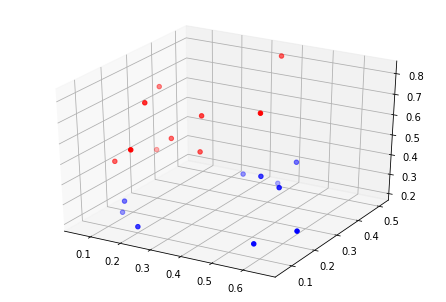

In [ ]:
import plotly.figure_factory as ff
cluster2 = hierarchical(prepared_data, 2)
vizualization3D(cluster2, [[0, 1, 2]])

fig = ff.create_dendrogram(np.array(prepared_data), color_threshold=0.7)
fig.update_layout(width=800, height=500)
fig.show()



Поділ на 3 кластери:

Об'єкт 1    Об'єкт 2    Відстань    Нова назва

 4            7           0.0675            7 

 0           19           0.0744           19 

 9           11           0.1037           11 

 3           12           0.1070           12 

15           19           0.1097           19 

 2            5           0.1230            5 

 6            7           0.1235            7 

12           19           0.1241           19 

14           16           0.1371           16 

 1           17           0.1427           17 

11           13           0.1445           13 

13           18           0.1867           18 

17           18           0.1972           18 

16           18           0.2189           18 

 8           10           0.2531           10 

 5           19           0.2620           19 

10           18           0.3643           18 

 7           19           0.3909           19 

18           19           0.4384           19 

{'0': {1, 8, 9, 10, 11, 13, 14, 16, 17, 

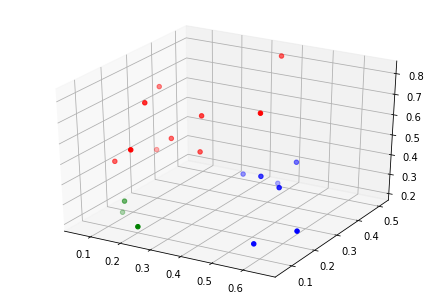

In [ ]:
import plotly.figure_factory as ff
cluster3 = hierarchical(prepared_data, 3)
vizualization3D(cluster3, [[0, 1, 2]])

fig = ff.create_dendrogram(np.array(prepared_data), color_threshold=0.55)
fig.update_layout(width=800, height=500)
fig.show()

Поділ на 4 кластери

Об'єкт 1    Об'єкт 2    Відстань    Нова назва

 4            7           0.0675            7 

 0           19           0.0744           19 

 9           11           0.1037           11 

 3           12           0.1070           12 

15           19           0.1097           19 

 2            5           0.1230            5 

 6            7           0.1235            7 

12           19           0.1241           19 

14           16           0.1371           16 

 1           17           0.1427           17 

11           13           0.1445           13 

13           18           0.1867           18 

17           18           0.1972           18 

16           18           0.2189           18 

 8           10           0.2531           10 

 5           19           0.2620           19 

10           18           0.3643           18 

 7           19           0.3909           19 

18           19           0.4384           19 

{'0': {8, 10}, '1': {1, 9, 11, 13, 14, 1

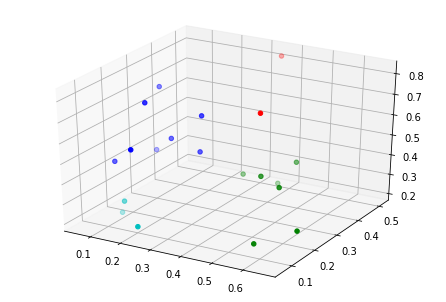

In [ ]:
import plotly.figure_factory as ff
cluster4 = hierarchical(prepared_data, 4)
vizualization3D(cluster4, [[0, 1, 2]])

fig = ff.create_dendrogram(np.array(prepared_data), color_threshold=0.5)
fig.update_layout(width=800, height=500)
fig.show()